<a href="https://colab.research.google.com/github/Gustavo0501/Trabalho_Grafos/blob/main/Etapa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# ============================
# Módulo 1 - Leitura do arquivo
# ============================

def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as f:
        linhas = f.readlines()

    info = {
        'vertices': 0,
        'arestas': [],
        'arcos': [],
        'arestas_requeridas': [],
        'arcos_requeridos': [],
        'vertices_requeridos': set(),
        'custo_total': 0,
        'capacidade': 0,
        'deposito': None
    }

    # Leitura do cabeçalho
    for linha in linhas:
        if linha.startswith('Depot Node'):
            info['deposito'] = int(linha.split(':')[1])
        elif linha.startswith('#Nodes'):
            info['vertices'] = int(linha.split(':')[1])
        elif linha.startswith('Capacity'):
            info['capacidade'] = int(linha.split(':')[1])
        elif linha.startswith('#Edges'):
            total_arestas = int(linha.split(':')[1])
        elif linha.startswith('#Arcs'):
            total_arcos = int(linha.split(':')[1])
        elif linha.startswith('#Required N'):
            total_req_n = int(linha.split(':')[1])
        elif linha.startswith('#Required E'):
            total_req_e = int(linha.split(':')[1])
        elif linha.startswith('#Required A'):
            total_req_a = int(linha.split(':')[1])
        elif linha.strip() == 'ReN.\tDEMAND\tS. COST':
            break

    # Leitura das seções
    secao = None
    for linha in linhas:
        linha = linha.strip()
        if not linha or linha.startswith('Name'):
            continue
        if linha.startswith('ReN.'):
            secao = 'ReN'
            continue
        elif linha.startswith('ReE.'):
            secao = 'ReE'
            continue
        elif linha.startswith('EDGE'):
            secao = 'EDGE'
            continue
        elif linha.startswith('ReA.'):
            secao = 'ReA'
            continue
        elif linha.startswith('ARC'):
            secao = 'ARC'
            continue

        colunas = linha.split()
        if secao == 'ReN':
            no = int(colunas[0][1:])
            info['vertices_requeridos'].add(no)
        elif secao == 'ReE':
            de, para = int(colunas[1]), int(colunas[2])
            custo, demanda = int(colunas[3]), int(colunas[4])
            info['arestas_requeridas'].append((de, para, custo, demanda))
            info['arestas'].append((de, para, custo))
        elif secao == 'EDGE':
            de, para = int(colunas[1]), int(colunas[2])
            custo = int(colunas[3])
            info['arestas'].append((de, para, custo))
        elif secao == 'ReA':
            de, para = int(colunas[1]), int(colunas[2])
            custo, demanda = int(colunas[3]), int(colunas[4])
            info['arcos_requeridos'].append((de, para, custo, demanda))
            info['arcos'].append((de, para, custo))
        elif secao == 'ARC':
            de, para = int(colunas[1]), int(colunas[2])
            custo = int(colunas[3])
            info['arcos'].append((de, para, custo))

    return info

# ============================
# Módulo 2 - Estatísticas básicas
# ============================
def calcular_estatisticas(grafo):
    print(f"Quantidade de vértices: {grafo['vertices']}")
    print(f"Quantidade de arestas: {len(grafo['arestas'])}")
    print(f"Quantidade de arcos: {len(grafo['arcos'])}")
    print(f"Quantidade de vértices requeridos: {len(grafo['vertices_requeridos'])}")
    print(f"Quantidade de arestas requeridas: {len(grafo['arestas_requeridas'])}")
    print(f"Quantidade de arcos requeridos: {len(grafo['arcos_requeridos'])}")

# ============================
# Execução inicial (exemplo)
# ============================
caminho_arquivo = "/content/mggdb_0.25_9.dat"
grafo = ler_arquivo_grafo(caminho_arquivo)
calcular_estatisticas(grafo)


Quantidade de vértices: 27
Quantidade de arestas: 12
Quantidade de arcos: 78
Quantidade de vértices requeridos: 9
Quantidade de arestas requeridas: 9
Quantidade de arcos requeridos: 29


In [56]:
# Cálculo da densidade do grafo

def calcular_densidade(info):
    V = info['vertices']
    A = len(info['arcos'])
    E = len(info['arestas'])

    densidade_direcionada = A / (V * (V - 1)) if V > 1 else 0
    densidade_nao_direcionada = (2 * E) / (V * (V - 1)) if V > 1 else 0

    print(f"Densidade (direcionado - arcos): {densidade_direcionada:.4f}")
    print(f"Densidade (não direcionado - arestas): {densidade_nao_direcionada:.4f}")

calcular_densidade(grafo)

Densidade (direcionado - arcos): 0.1111
Densidade (não direcionado - arestas): 0.0342


In [57]:
def construir_grafo(info):
    grafo = {v: set() for v in range(1, info['vertices'] + 1)}


    for u, v, _ in info['arestas']:
        grafo[u].add(v)
        grafo[v].add(u)

    for u, v, _ in info['arcos']:
        grafo[u].add(v)

    return grafo

def dfs(grafo, v, visitado):
    visitado.add(v)
    for vizinho in grafo[v]:
        if vizinho not in visitado:
            dfs(grafo, vizinho, visitado)

def contar_componentes_conectados(info):
    grafo = construir_grafo(info)
    visitado = set()
    componentes = 0

    for v in range(1, info['vertices'] + 1):
        if v not in visitado:
            dfs(grafo, v, visitado)
            componentes += 1

    print(f"Componentes conectados: {componentes}")

contar_componentes_conectados(grafo)

Componentes conectados: 1


In [58]:
def calcular_graus(info):
    graus = {v: 0 for v in range(1, info['vertices'] + 1)}

    # Considera arestas (não direcionadas)
    for u, v, _ in info['arestas']:
        graus[u] += 1
        graus[v] += 1

    # Considera arcos
    for u, v, _ in info['arcos']:
        graus[u] += 1

    grau_min = min(graus.values())
    grau_max = max(graus.values())

    print(f"Grau mínimo dos vértices: {grau_min}")
    print(f"Grau máximo dos vértices: {grau_max}")

calcular_graus(grafo)

Grau mínimo dos vértices: 2
Grau máximo dos vértices: 7


In [59]:
import math

def floyd_warshall(info):
    V = info['vertices']
    dist = [[math.inf] * (V + 1) for _ in range(V + 1)]
    pred = [[-1] * (V + 1) for _ in range(V + 1)]

    # Inicializa distâncias com 0 para si mesmo
    for v in range(1, V + 1):
        dist[v][v] = 0

    # Arestas (não direcionadas)
    for u, v, c in info['arestas']:
        dist[u][v] = c
        dist[v][u] = c
        pred[u][v] = u
        pred[v][u] = v

    # Arcos (direcionados)
    for u, v, c in info['arcos']:
        dist[u][v] = c
        pred[u][v] = u

    # Floyd-Warshall principal
    for k in range(1, V + 1):
        for i in range(1, V + 1):
            for j in range(1, V + 1):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]

    return dist, pred


In [60]:
def calcular_intermediacao(dist, pred):
    V = len(dist) - 1
    inter = {v: 0 for v in range(1, V + 1)}

    for s in range(1, V + 1):
        for t in range(1, V + 1):
            if s != t:
                caminho = []
                v = t
                while v != -1 and v != s:
                    caminho.append(v)
                    v = pred[s][v]
                if v == s:
                    for vtx in caminho:
                        if vtx != s and vtx != t:
                            inter[vtx] += 1

    print("Intermediação de cada vértice:")
    for v in sorted(inter.keys()):
        print(f"Vértice {v}: {inter[v]}")


In [61]:
distancias, predecessores = floyd_warshall(grafo)
calcular_intermediacao(distancias, predecessores)


Intermediação de cada vértice:
Vértice 1: 100
Vértice 2: 0
Vértice 3: 0
Vértice 4: 172
Vértice 5: 36
Vértice 6: 104
Vértice 7: 0
Vértice 8: 92
Vértice 9: 0
Vértice 10: 112
Vértice 11: 0
Vértice 12: 170
Vértice 13: 152
Vértice 14: 136
Vértice 15: 14
Vértice 16: 0
Vértice 17: 16
Vértice 18: 100
Vértice 19: 60
Vértice 20: 6
Vértice 21: 20
Vértice 22: 16
Vértice 23: 44
Vértice 24: 66
Vértice 25: 58
Vértice 26: 40
Vértice 27: 56


In [62]:
def calcular_caminho_medio_e_diametro(dist):
    V = len(dist) - 1
    soma = 0
    contador = 0
    diametro = 0

    for i in range(1, V + 1):
        for j in range(1, V + 1):
            if i != j and dist[i][j] < math.inf:
                soma += dist[i][j]
                contador += 1
                diametro = max(diametro, dist[i][j])

    caminho_medio = soma / contador if contador else 0

    print(f"Caminho médio: {caminho_medio:.4f}")
    print(f"Diâmetro: {diametro}")

calcular_caminho_medio_e_diametro(distancias)

Caminho médio: 10.3846
Diâmetro: 24


In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def plotar_grafo(info):
    # Garante que os dados estejam no formato correto (tuplas)
    info['arestas_requeridas'] = {tuple(sorted(a)) for a in info['arestas_requeridas']}
    info['arcos_requeridos'] = {tuple(a) for a in info['arcos_requeridos']}

    # Gera posições circulares para os vértices
    num_vertices = info['vertices']
    angulo = 2 * math.pi / num_vertices
    posicoes = {
        v: (math.cos(i * angulo), math.sin(i * angulo)) for i, v in enumerate(range(1, num_vertices + 1))
    }

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.axis('off')

    # Arestas não direcionadas
    for u, v, _ in info['arestas']:
        x1, y1 = posicoes[u]
        x2, y2 = posicoes[v]
        par = tuple(sorted((u, v)))
        cor = 'blue' if par in info['arestas_requeridas'] else 'lightgray'
        ax.plot([x1, x2], [y1, y2], color=cor, linewidth=2)

    # Arcos direcionados (setas)
    for u, v, _ in info['arcos']:
        x1, y1 = posicoes[u]
        x2, y2 = posicoes[v]
        dx, dy = x2 - x1, y2 - y1
        par = (u, v)
        cor = 'red' if par in info['arcos_requeridos'] else 'lightgray'
        ax.arrow(x1, y1, dx * 0.8, dy * 0.8, head_width=0.05, head_length=0.05, fc=cor, ec=cor, length_includes_head=True)

    # Nós (vértices)
    for v, (x, y) in posicoes.items():
        cor = 'green' if v in info['vertices_requeridos'] else 'white'
        ax.add_patch(plt.Circle((x, y), 0.05, color=cor, ec='black'))
        ax.text(x, y, str(v), fontsize=10, ha='center', va='center')

    # Legenda
    azul = mpatches.Patch(color='blue', label='Arestas requeridas')
    vermelho = mpatches.Patch(color='red', label='Arcos requeridos')
    verde = mpatches.Patch(color='green', label='Vértices requeridos')
    cinza = mpatches.Patch(color='lightgray', label='Não requeridos')
    plt.legend(handles=[azul, vermelho, verde, cinza], loc='lower left')

    plt.title("Visualização do Grafo")


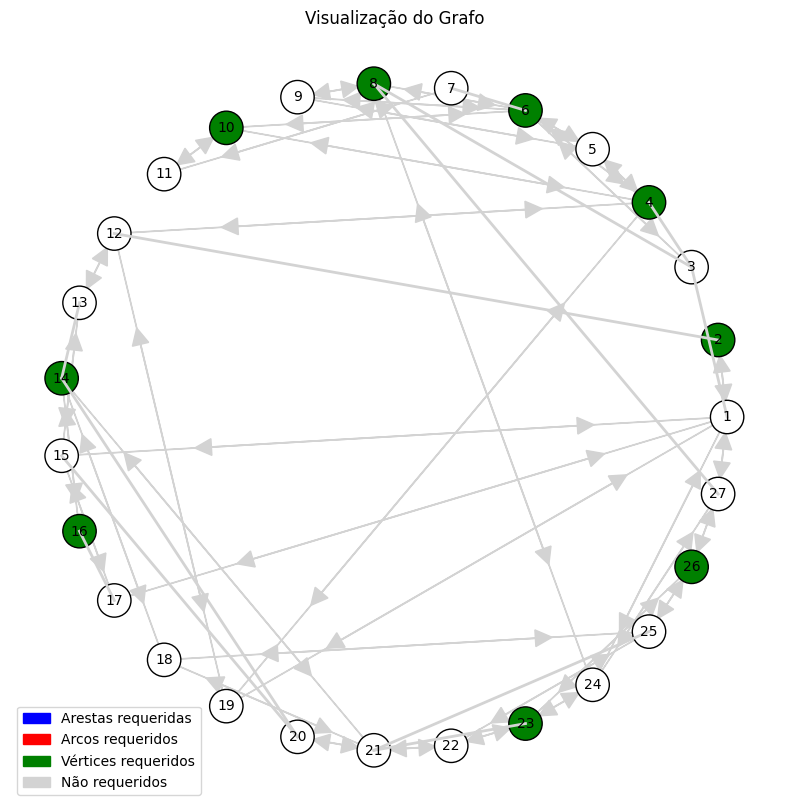

In [64]:
plotar_grafo(grafo)